In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD

In [13]:
def evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, momentum):

    # define model
    model = tf.keras.Sequential()
    model.add(layers.Dense(50, activation='relu', name='layer-0', input_shape=(n_input,)))
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-1'))
    
    # compile model
    opt = SGD(learning_rate=0.1, momentum=momentum)
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)     
    return history

In [14]:
trainX, trainy, testX, testy = ut.create_dataset(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
n_input, n_classes = trainX.shape[1], testy.shape[1]
print(trainX.shape)
print(testy.shape)

(500, 2)
(500, 3)


[0.0, 0.5, 0.9, 0.99]


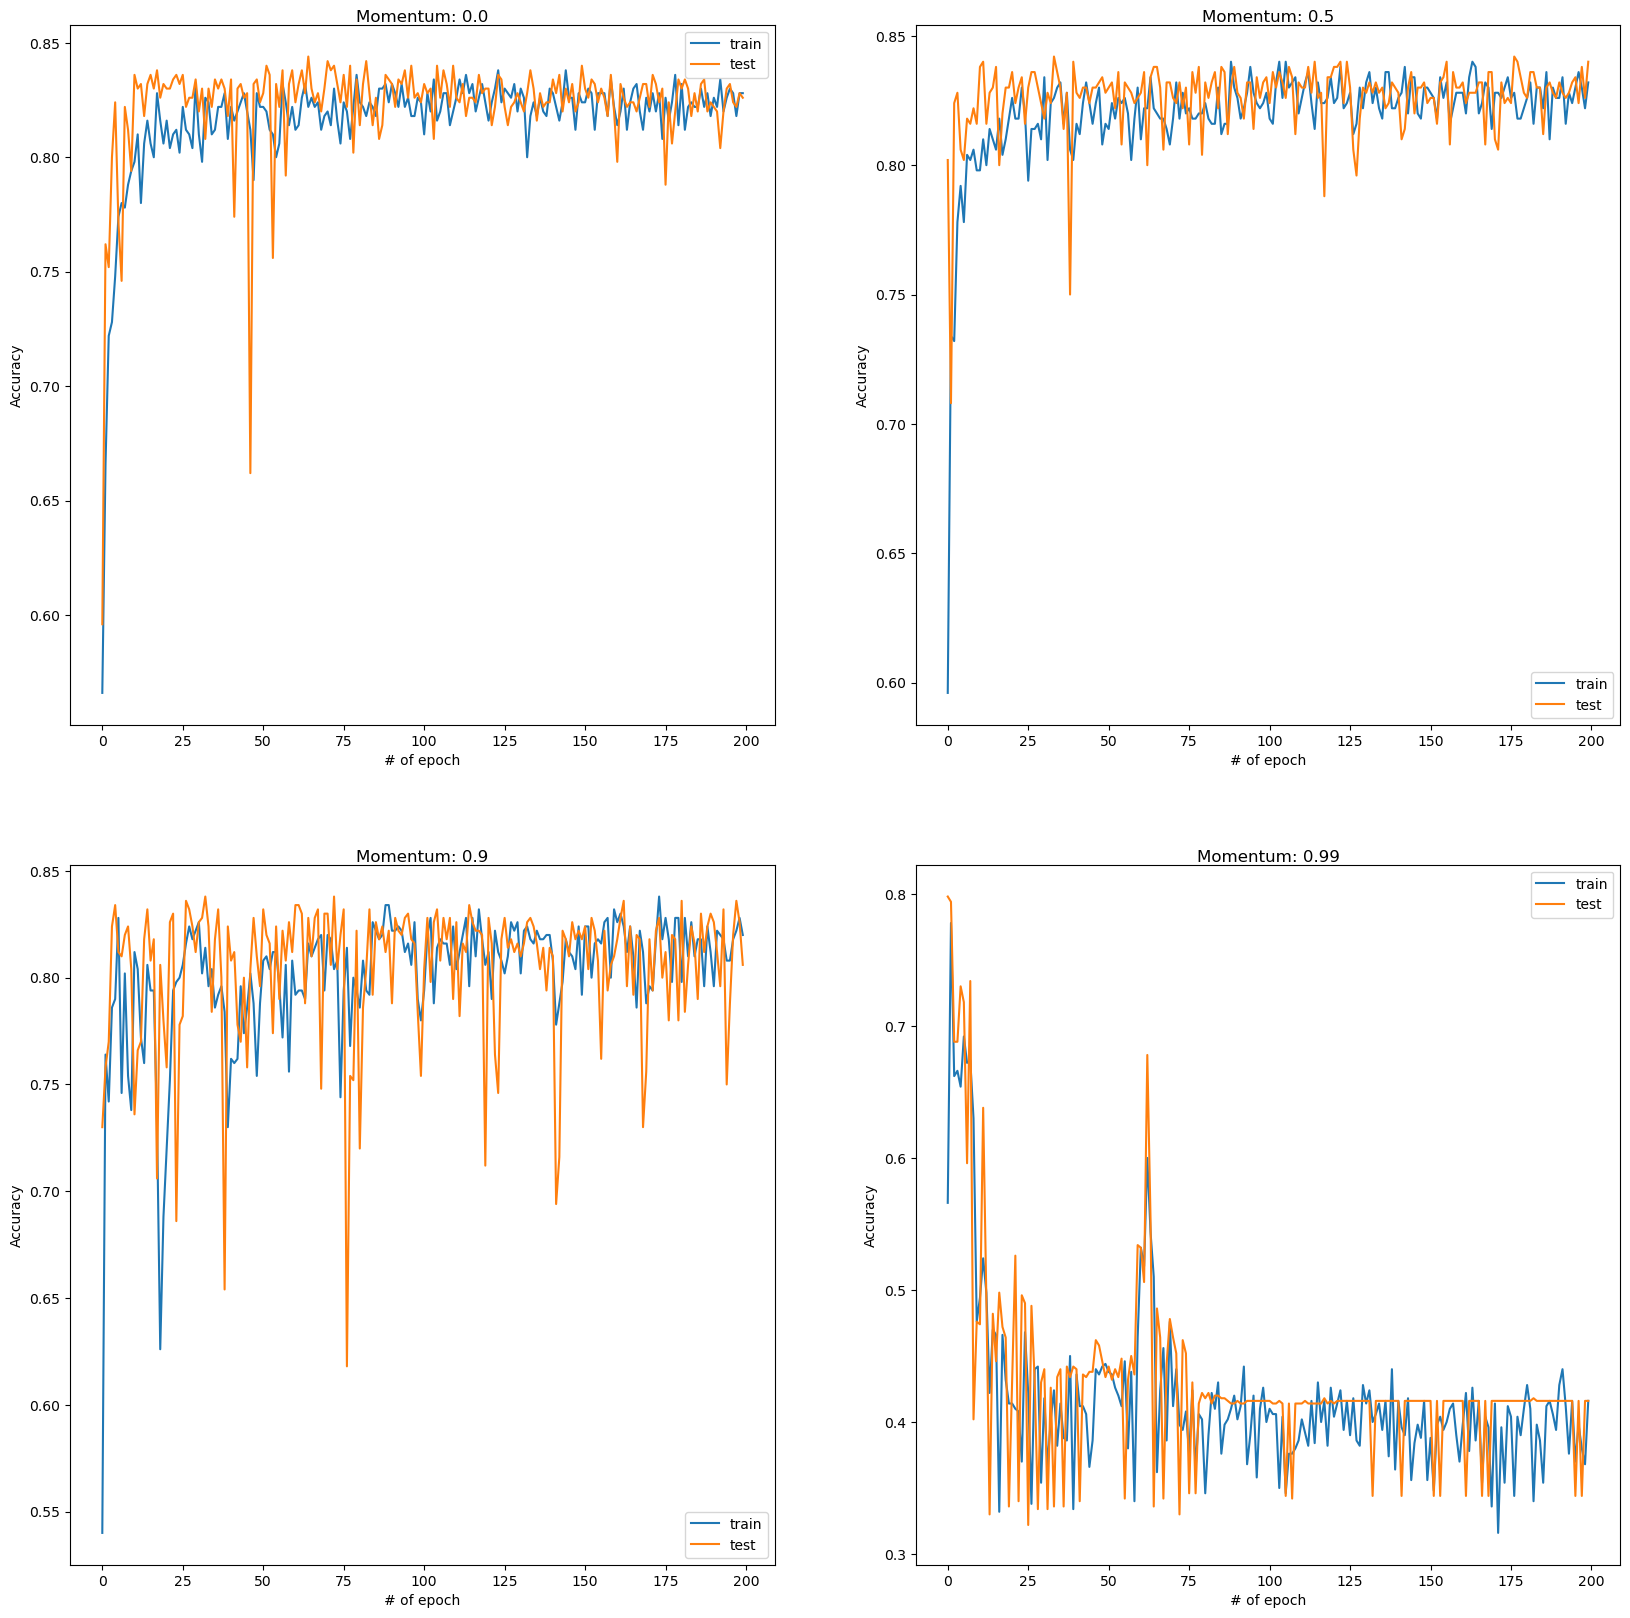

In [15]:
# plot learning curves
momentum_arr = [0.0, 0.5, 0.9, 0.99]
print(momentum_arr)

plt.figure(figsize=(20,20))
i = 0
for momentum in momentum_arr:
  history = evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, momentum)
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  plt.plot(history.history['accuracy'], label='train')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Momentum: {momentum}', pad=-80)
  plt.legend()

  plt.plot(history.history['val_accuracy'], label='test')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Momentum: {momentum}', pad=-80)
  plt.legend()
  i = i+1


plt.show()